In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

### Lab 5
Utilice el código compartido en el archivo lstm_lab.ipynb como base para construir un modelo que pronostique el sentimiento de una reseña de película.

In [2]:
# Parameters
max_features = 20000  # Number of words to consider from the dataset
maxlen = 100  # Maximum length of each review
batch_size = 32
epochs = 5

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.7092 - loss: 0.5423 - val_accuracy: 0.8375 - val_loss: 0.3761
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8687 - loss: 0.3211 - val_accuracy: 0.8440 - val_loss: 0.3746
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.9101 - loss: 0.2362 - val_accuracy: 0.8347 - val_loss: 0.3959
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.9382 - loss: 0.1692 - val_accuracy: 0.8358 - val_loss: 0.4514
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9584 - loss: 0.1184 - val_accuracy: 0.8375 - val_loss: 0.5028


In [8]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8362 - loss: 0.5162
Test score: 0.5027825236320496
Test accuracy: 0.8374800086021423


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

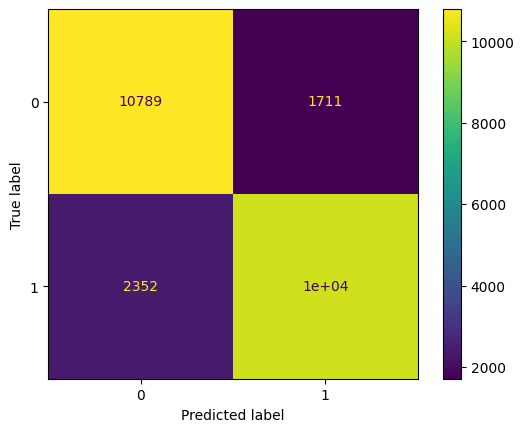

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(x_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix
